In [68]:
import pandas as pd
import numpy as np

In [69]:
ap_data = pd.read_excel("all_data_7.xlsx")

In [70]:
ap_data['all_num'].describe()

count    672.000000
mean      13.543155
std       13.064596
min        0.000000
25%        0.000000
50%       12.000000
75%       22.250000
max       78.000000
Name: all_num, dtype: float64

In [71]:
ap_data.set_index(ap_data['date'], inplace=True)

In [72]:
ap_data = ap_data[:576]

In [73]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 576 entries, 2019-09-20 00:00:00 to 2019-10-13 23:00:00
Data columns (total 17 columns):
date            576 non-null datetime64[ns]
all_num         576 non-null int64
rank            576 non-null int64
temp            576 non-null float64
humid           576 non-null float64
co2             576 non-null float64
voc             576 non-null float64
pm25            576 non-null float64
light           576 non-null float64
noise           576 non-null float64
기온              576 non-null float64
강수량             576 non-null float64
풍속              576 non-null float64
습도              576 non-null int64
date_day        576 non-null int64
date_hour       576 non-null int64
date_weekday    576 non-null int64
dtypes: datetime64[ns](1), float64(10), int64(6)
memory usage: 81.0 KB


Text(0, 0.5, '대여횟수')

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

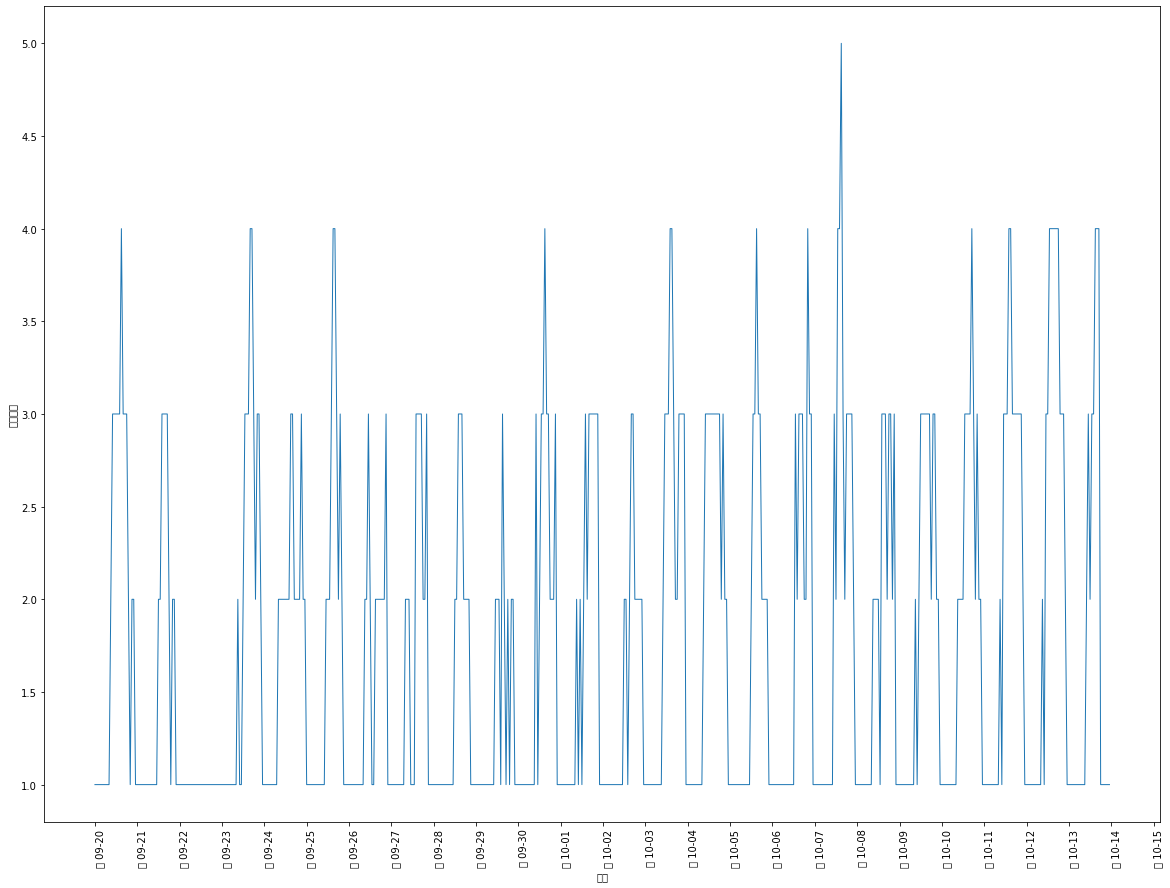

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
xticks = pd.date_range(start = '2019-09-20', end ='2019-10-17')
week  = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m-%d"))]
plt.xticks(xticks,xticks_name , rotation = 90, ha = "left")
plt.plot(ap_data['rank'],linewidth = 1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [75]:
y = ap_data['rank'].values
X = ap_data.index.astype("int64").values.reshape(-1,1)

In [76]:
n_train = 450

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train,y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train,y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (15,15))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation = 90, ha="left")
    
    plt.plot(range(n_train), y_train, label = "훈련")
    plt.plot(range(n_train, len(y_test) +  n_train), y_test, '-', label = "테스트")
    plt.plot(range(n_train), y_pred_train, '--', label = "훈련 예측")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = "테스트 예측")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")
    

테스트 세트 R^2: 0.16


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

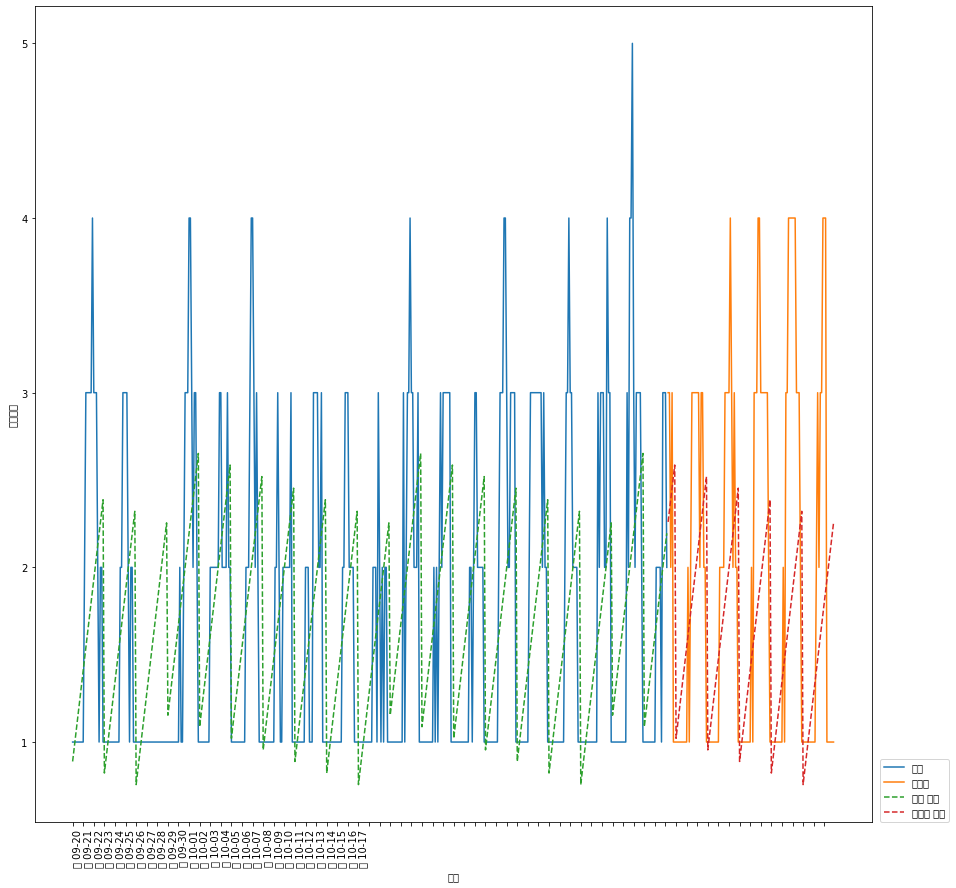

In [78]:
from sklearn.linear_model import LinearRegression

X_hour_week = np.hstack([ap_data.index.hour.values.reshape(-1,1),ap_data.index.dayofweek.values.reshape(-1,1)])
                        
                                             
eval_on_features(X_hour_week, y, LinearRegression())


# ap_data.index.day.values.reshape(-1,1), ap_data.humid.values.reshape(-1,1),
#                          ap_data.temp.values.reshape(-1,1),ap_data.기온.values.reshape(-1,1),
#                          ap_data.습도.values.reshape(-1,1),ap_data.강수량.values.reshape(-1,1),
#                          ap_data.풍속.values.reshape(-1,1),ap_data.voc.values.reshape(-1,1),
#                          ap_data.co2.values.reshape(-1,1),ap_data.pm25.values.reshape(-1,1),
#                          ap_data.light.values.reshape(-1,1),ap_data.noise.values.reshape(-1,1)])

In [65]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


테스트 세트 R^2: 0.47


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

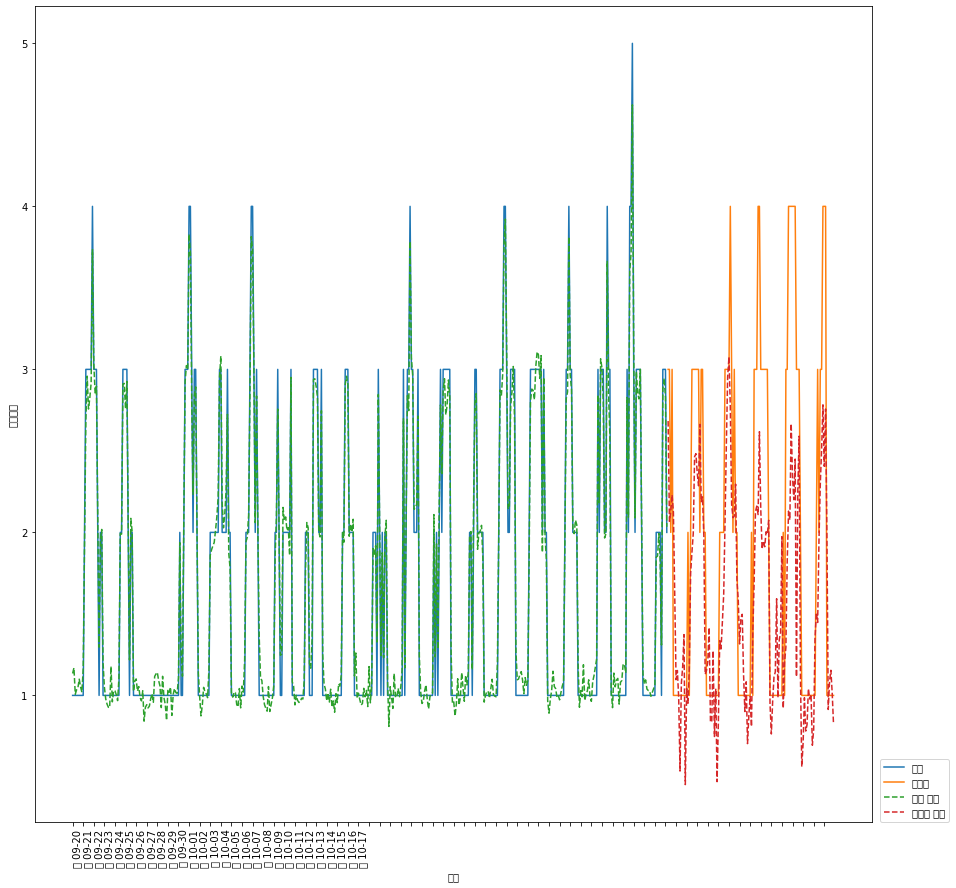

In [66]:
from sklearn.linear_model import Ridge

eval_on_features(X_hour_week_onehot, y, Ridge())

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)


MemoryError: Unable to allocate array with shape (576, 887778) and data type float64